In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

art = pd.read_csv("data/articles_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/customer_processed.csv")               # 고객 메타데이터
total_revenue = pd.read_csv("data/total_revenue.csv")       # 매출 데이터

In [208]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis_master = (
    total_revenue
    .merge(cust, on="Customer_Id", how="inner")
    .merge(art, on="Article_Id", how="inner")
)
analysis_master.shape

(804149, 27)

In [209]:
pd.set_option('display.max_columns', None)
analysis_master.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50s,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005)
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,5,2019-05,05-22,0.067746,middle,False,False,Active,NaN,28,20s,760597,BUBBLE WRAP TOP,Top (254),Garment Upper body,Stripe (1010017),White (9),Jersey (1660),Ladieswear (A),Ladieswear (1),Womens Casual (6),Jersey Fancy (1005)
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,5,2019-05,05-10,0.016932,bottom_20,True,True,Active,Regularly,37,30s,488561,Teddy jogger.,Shorts (274),Garment Lower body,Chambray (1010024),Blue (2),Shorts (5658),Menswear (F),Menswear (3),Contemporary Casual (21),Shorts (1025)
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,8,2019-08,08-26,0.033881,middle,False,False,Active,NaN,19,10s,682771,Yuki shopper,Bag (66),Accessories,Solid (1010016),Black (5),Bags (3209),Ladies Accessories (C),Ladieswear (1),Womens Big accessories (65),Accessories (1019)
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,8,2019-08,08-10,0.028627,middle,False,False,Active,NaN,35,30s,742400,1pk Sportsock,Socks (302),Socks & Tights,All over pattern (1010001),White (9),Socks Wall (5999),Menswear (F),Menswear (3),Men Underwear (26),Socks and Tights (1021)


### 2019년 H&M의 판매량은 어떤 고객군이 어떤 채널과 어떤 상품을 통해 만들어내고 있을까?
### **→ 2019년 H&M 판매량 데이터 기반 고객/상품 구매 패턴 분석**

### 주요 사용 컬럼
- Customer_Id
- Sales_Channel_Id
- Age
- Age_Group
- Product_Type_Info
- Perceived_Colour_Master_Info

## 시각화

In [210]:
df = analysis_master.copy()

In [211]:
df['Sales_Channel_Id'] = df['Sales_Channel_Id'].replace({1: '오프라인', 2: '온라인'})
df['Age_Group'] = df['Age_Group'].replace({'10s': '10대', '20s': '20대', '30s': '30대', '40s': '40대', '50s': '50대', '60s+': '60대+'})

### 채널별 판매량 비교

In [212]:
channel_cnt = df.groupby('Sales_Channel_Id').size().reset_index(name='Purchase_Cnt')

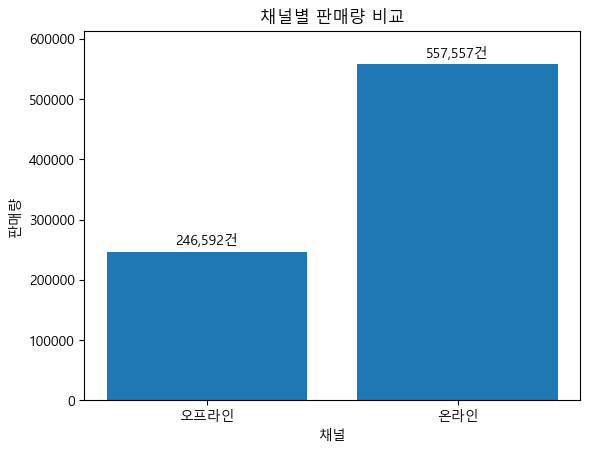

In [213]:
bars = plt.bar(channel_cnt['Sales_Channel_Id'], channel_cnt["Purchase_Cnt"])

# 각 막대의 높이값(v)을 가져와서 '숫자+건' 형태의 리스트 생성
labels = [f'{int(v):,}건' for v in channel_cnt["Purchase_Cnt"]]

# labels 인자에 위에서 만든 리스트를 전달
plt.bar_label(bars, labels=labels, padding=3, fontsize=10)

plt.title("채널별 판매량 비교")
plt.xlabel("채널")
plt.ylabel("판매량")

# y축 범위를 살짝 높여서 라벨이 잘리지 않게 조정 (선택사항)
plt.ylim(0, channel_cnt["Purchase_Cnt"].max() * 1.1)

plt.show()

### 연령대별 판매량 비교

In [214]:
age_cnt = df.groupby('Age_Group').size().reset_index(name='Purchase_Cnt')

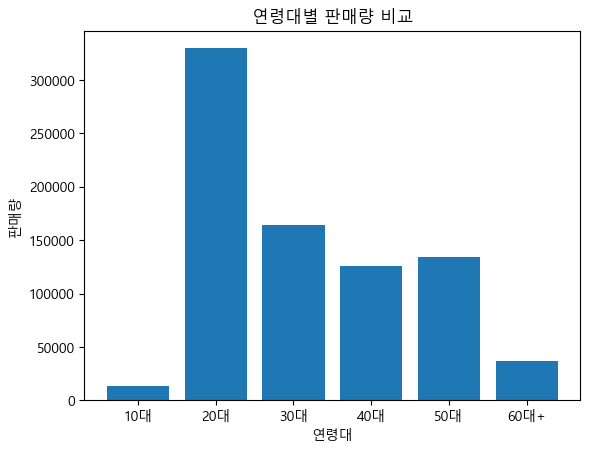

In [215]:
plt.bar(age_cnt['Age_Group'], age_cnt["Purchase_Cnt"])
plt.title("연령대별 판매량 비교")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

### 채널 - 연령대 판매량

In [216]:
age_channel_cnt = df.groupby(['Age_Group', 'Sales_Channel_Id']).size().reset_index(name='Purchase_Cnt')

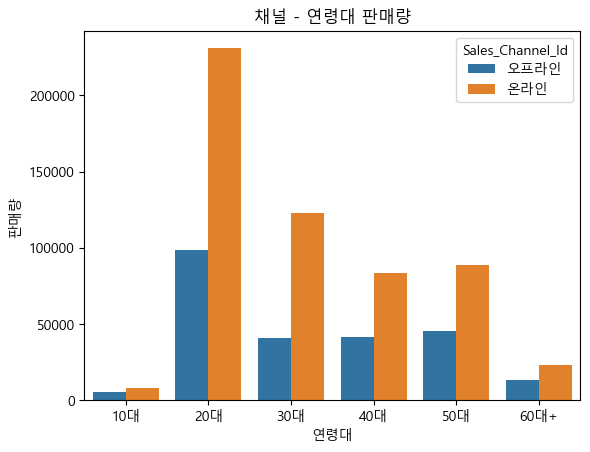

In [217]:
sns.barplot(data=age_channel_cnt, x='Age_Group', y='Purchase_Cnt', hue='Sales_Channel_Id')

plt.title("채널 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("판매량")
plt.show()

#### **H&M의 판매량은 20–30대 연령층, 특히 온라인 채널에 강하게 집중되어 있다.**

### 상품군별 판매량 TOP 10

In [218]:
product_cnt = df.groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
product_cnt

,Product_Type_Info,Purchase_Cnt
97,Trousers (272),105465
25,Dress (265),80749
87,Sweater (252),70385
92,T-shirt (255),56036
95,Top (254),41753
9,Blouse (258),40494
107,Vest top (253),37281
76,Shorts (274),32993
13,Bra (306),31788
89,Swimwear bottom (59),30166


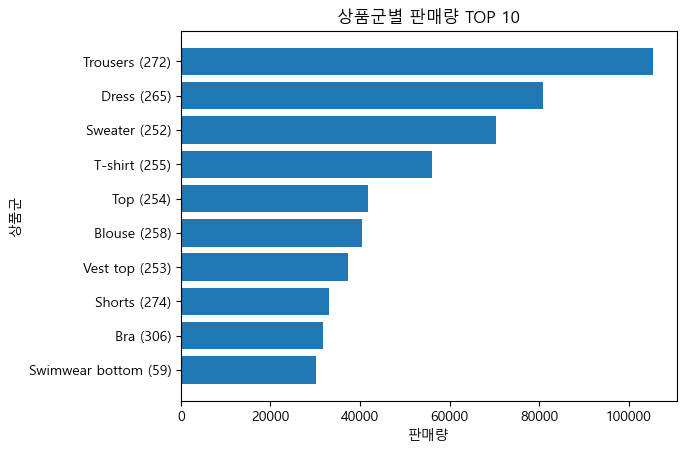

In [219]:
plt.barh(product_cnt['Product_Type_Info'], product_cnt['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("상품군별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("상품군")
plt.show()

### 상품군 - 연령대 판매량

In [220]:
product_age_cnt = df.groupby(['Product_Type_Info', 'Age_Group']).size().reset_index(name='Purchase_Cnt')

In [221]:
top_products = product_cnt['Product_Type_Info'].tolist()

# 판매량 TOP 10 상품군만 필터링
product_age_cnt_top = product_age_cnt[product_age_cnt['Product_Type_Info'].isin(top_products)]

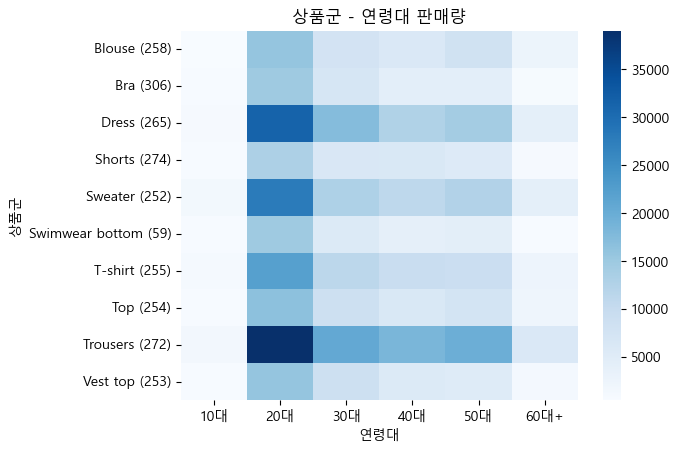

In [222]:
pivot_1 = product_age_cnt_top.pivot(index='Product_Type_Info', columns='Age_Group', values='Purchase_Cnt')

sns.heatmap(pivot_1, cmap="Blues")
plt.title("상품군 - 연령대 판매량")
plt.xlabel("연령대")
plt.ylabel("상품군")
plt.show()


### 연령대별 1인당 평균 구매 건수

In [223]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique()
age_purchase_cnt = df.groupby('Age_Group').size()

age_frequency = (age_purchase_cnt / age_customer_cnt).reset_index()
age_frequency.columns = ['Age_Group', 'Avg_Purchase_Per_Customer']
age_frequency

,Age_Group,Avg_Purchase_Per_Customer
0,10대,1.579214
1,20대,2.267642
2,30대,2.492421
3,40대,2.366570
4,50대,2.230542
5,60대+,2.009302


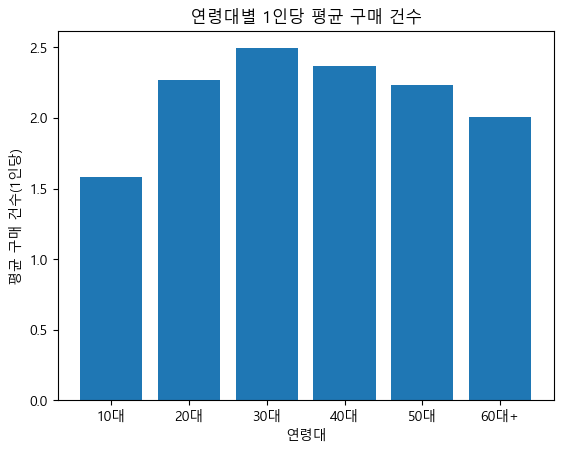

In [224]:
plt.bar(age_frequency['Age_Group'], age_frequency['Avg_Purchase_Per_Customer'])

plt.title("연령대별 1인당 평균 구매 건수")
plt.xlabel("연령대")
plt.ylabel("평균 구매 건수(1인당)")
plt.show()


### 연령대별 구매 고객 수

In [225]:
age_customer_cnt = df.groupby('Age_Group')['Customer_Id'].nunique().reset_index(name='Customer_Count')

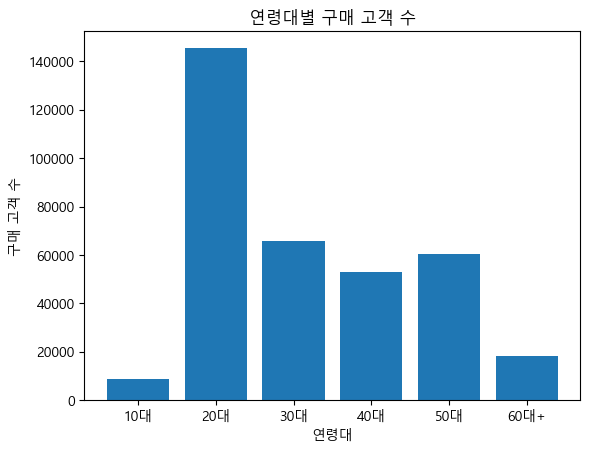

In [226]:
plt.bar(age_customer_cnt['Age_Group'], age_customer_cnt['Customer_Count'])

plt.title("연령대별 구매 고객 수")
plt.xlabel("연령대")
plt.ylabel("구매 고객 수")
plt.show()

#### **30대는 전체 구매 고객 수 2위이며, 1인당 평균 구매 건수도 가장 높게 나타나 20대와 함께 H&M의 판매량을 견인하는 핵심 고객층임을 알 수 있다.**

#### **2019년 H&M의 매출 구조는 20대의 두터운 고객층과 30대의 높은 구매 빈도가 주요하게 작용한 결과이다.**

--------------------

### 20대와 30대는 각각의 연령대를 집중적으로 분석하되, 4-50대도 하나의 그룹으로 묶어 분석을 진행하려고 한다.

> 4-50대는 고객 수/평균 구매 건수 모두 중간이지만 해당 연령대를 무시하기엔 비중이 큼

## 4-50대

In [227]:
df_4050 = df[df['Age_Group'].isin(['40대', '50대'])]

In [228]:
df_20 = df[df['Age_Group'] == '20대']

In [229]:
df_30 = df[df['Age_Group'] == '30대']

### 4-50대 색상 판매량 TOP 10

In [230]:
color = df.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),273981
2,Blue (2),111414
15,White (9),110474
0,Beige (11),51218
5,Grey (12),46190
12,Red (18),43761
11,Pink (4),35029
4,Green (19),22184
6,Khaki green (20),22049
16,Yellow (8),19759


In [231]:
color_4050 = df_4050.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_4050

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),86589
2,Blue (2),40054
15,White (9),36119
5,Grey (12),16433
0,Beige (11),16276
12,Red (18),12678
11,Pink (4),10614
6,Khaki green (20),7985
4,Green (19),6999
3,Brown (13),6167


In [232]:
color_20 = df_20.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_20

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),116716
15,White (9),45130
2,Blue (2),41711
0,Beige (11),20547
12,Red (18),20094
5,Grey (12),16885
11,Pink (4),14431
4,Green (19),9021
16,Yellow (8),8703
6,Khaki green (20),8014


In [233]:
color_30 = df_30.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
color_30

,Perceived_Colour_Master_Info,Purchase_Cnt
1,Black (5),55549
2,Blue (2),22354
15,White (9),21336
0,Beige (11),10500
5,Grey (12),9783
12,Red (18),8463
11,Pink (4),7870
4,Green (19),4853
6,Khaki green (20),4544
3,Brown (13),4120


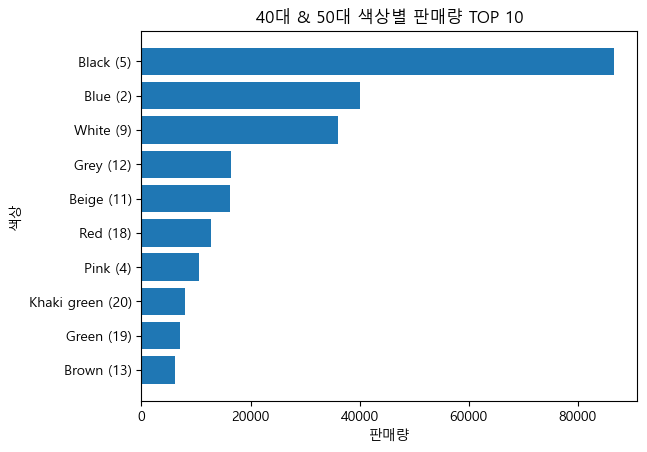

In [234]:
plt.barh(color_4050['Perceived_Colour_Master_Info'], color_4050['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("40대 & 50대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

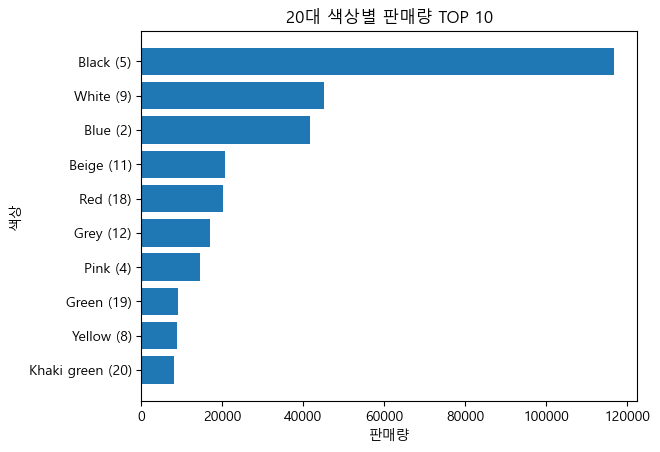

In [235]:
plt.barh(color_20['Perceived_Colour_Master_Info'], color_20['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("20대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

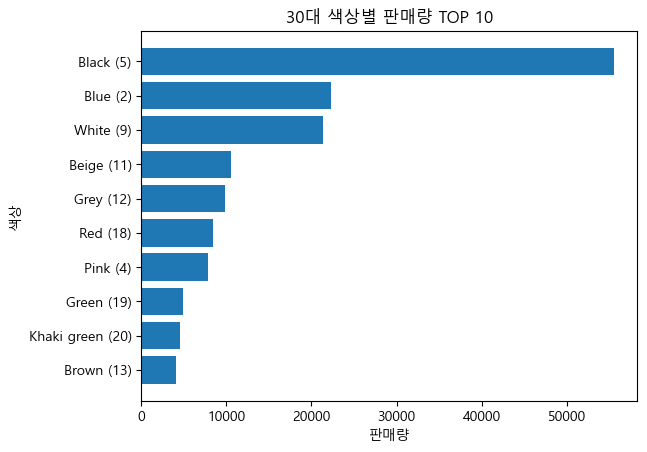

In [236]:
plt.barh(color_30['Perceived_Colour_Master_Info'], color_30['Purchase_Cnt'])
plt.gca().invert_yaxis()

plt.title("30대 색상별 판매량 TOP 10")
plt.xlabel("판매량")
plt.ylabel("색상")
plt.show()

### 판매 건수 말고 비율로 보고 싶어서 다시 정리

In [237]:
total_4050 = color_4050['Purchase_Cnt'].sum()

In [238]:
color_4050['Purchase_Ratio'] = color_4050['Purchase_Cnt']/total_4050*100
top_color_4050 = color_4050.sort_values('Purchase_Ratio', ascending=False).head(10)

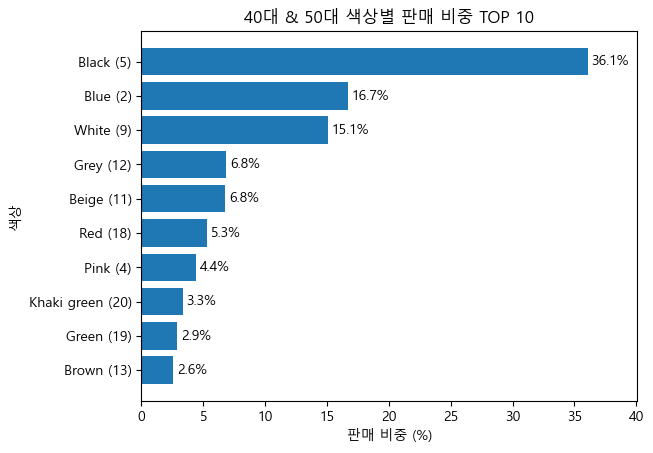

In [239]:
plt.barh(top_color_4050['Perceived_Colour_Master_Info'], top_color_4050['Purchase_Ratio'])
plt.gca().invert_yaxis()

for i, v in enumerate(top_color_4050['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )
    
plt.xlim(0, top_color_4050['Purchase_Ratio'].max() + 4)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("40대 & 50대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

In [240]:
total_20 = color_20['Purchase_Cnt'].sum()
total_30 = color_30['Purchase_Cnt'].sum()

In [241]:
color_20['Purchase_Ratio'] = color_20['Purchase_Cnt']/total_20*100
top_color_20 = color_20.sort_values('Purchase_Ratio', ascending=False).head(10)

In [242]:
color_30['Purchase_Ratio'] = color_30['Purchase_Cnt']/total_30*100
top_color_30 = color_30.sort_values('Purchase_Ratio', ascending=False).head(10)

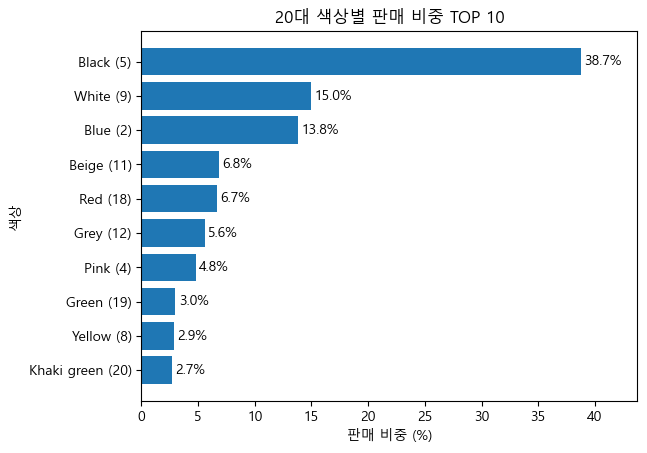

In [243]:
plt.barh(top_color_20['Perceived_Colour_Master_Info'], top_color_20['Purchase_Ratio'])
plt.gca().invert_yaxis()

for i, v in enumerate(top_color_20['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )

plt.xlim(0, top_color_20['Purchase_Ratio'].max() + 5)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("20대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

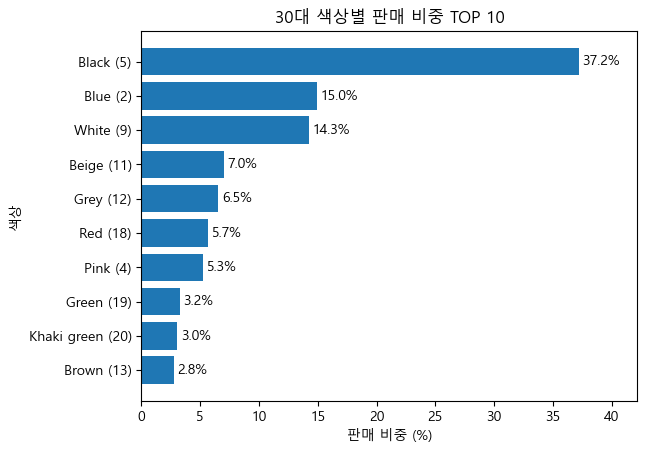

In [244]:
plt.barh(top_color_30['Perceived_Colour_Master_Info'], top_color_30['Purchase_Ratio'])
plt.gca().invert_yaxis()

for i, v in enumerate(top_color_30['Purchase_Ratio']):
    plt.text(
        v + 0.3,       # x 위치 (막대 끝보다 살짝 오른쪽)
        i,             # y 위치 (막대 인덱스)
        f"{v:.1f}%",   # 표시할 텍스트 (소수점 1자리 %)
        va="center"    # 세로 중앙 정렬
    )
    
plt.xlim(0, top_color_30['Purchase_Ratio'].max() + 5)   # 1위 라벨이 그래프 밖으로 나가서 x축 연장

plt.title("30대 색상별 판매 비중 TOP 10")
plt.xlabel("판매 비중 (%)")
plt.ylabel("색상")
plt.show()

#### 연령대별 색상 선호 정도는 활용하려면 팀원들과 함께 인사이트 도출 필요

### 40-50대 상위 20%, 하위 20%의 평균 구매 건수

In [245]:
# 사전 준비 컬럼
# df_4050 = df[df['Age_Group'].isin(['40대', '50대'])]
# color_4050 = df_4050.groupby('Perceived_Colour_Master_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)


# total_4050 = color_4050['Purchase_Cnt'].sum()
# color_4050['Purchase_Ratio'] = color_4050['Purchase_Cnt']/total_4050*100
# top_color_4050 = color_4050.sort_values('Purchase_Ratio', ascending=False).head(10)

In [246]:
customer_purchase_cnt_4050 = df_4050.groupby('Customer_Id').size().reset_index(name='Purchase_Cnt')

In [247]:
customer_purchase_cnt_4050 = customer_purchase_cnt_4050.sort_values('Purchase_Cnt', ascending=False).reset_index(drop=True)  # drop=True 해서 인덱스 번호 새로 매기기

In [248]:
n_customers_4050 = len(customer_purchase_cnt_4050)
top_20_4050 = int(n_customers_4050 * 0.2)
bottom_20_4050 = int(n_customers_4050 * 0.8)

In [249]:
customer_purchase_cnt_4050['Purchase_Group_4050'] = 'Middle'  # 먼저 전체 Middle로 하고 상위 20, 하위 20 태그 지정

customer_purchase_cnt_4050.loc[customer_purchase_cnt_4050.index < top_20_4050, 'Purchase_Group_4050'] = 'Top 20'

customer_purchase_cnt_4050.loc[customer_purchase_cnt_4050.index >= bottom_20_4050, 'Purchase_Group_4050'] = 'Bottom 20'

In [250]:
group_summary_4050 = customer_purchase_cnt_4050.groupby('Purchase_Group_4050')['Purchase_Cnt'].mean().reset_index()
group_summary_4050['Purchase_Cnt'] = group_summary_4050['Purchase_Cnt'].round(2)
group_summary_4050

,Purchase_Group_4050,Purchase_Cnt
0,Bottom 20,1.00
1,Middle,1.64
2,Top 20,5.56


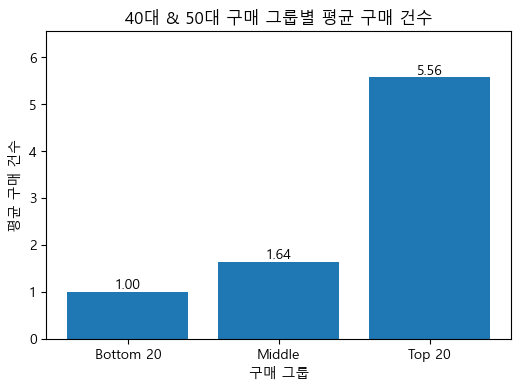

In [251]:
plt.figure(figsize=(6,4))

bars = plt.bar(group_summary_4050['Purchase_Group_4050'], group_summary_4050['Purchase_Cnt'])

for bar in bars:                                   # 라벨링 부분
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )
    
plt.ylim(0, group_summary_4050['Purchase_Cnt'].max() + 1)   # Top 20 라벨이 잘 보이도록 y축 연장

plt.title("40대 & 50대 구매 그룹별 평균 구매 건수")
plt.xlabel("구매 그룹")
plt.ylabel("평균 구매 건수")

plt.show()


### 40-50대 상위 20%, 하위 20%의 선호 제품군

In [252]:
df_4050 = df_4050.merge(customer_purchase_cnt_4050[['Customer_Id', 'Purchase_Group_4050']], on='Customer_Id', how='left')  # df_4050 테이블에 상위 20%, 하위 20%, Middle 태그 컬럼 붙이기

In [253]:
df_4050.head()

,T_Dat,Customer_Id,Article_Id,Revenue,Sales_Channel_Id,Month,Year_Month,Month_Day,Total_Revenue,Revenue_Group,Fn,Active,Club_Member_Status,Fashion_News_Frequency,Age,Age_Group,Product_Code,Prod_Name,Product_Type_Info,Product_Group_Name,Graphical_Appearance_Info,Perceived_Colour_Master_Info,Department_Info,Index_Info,Index_Group_Info,Section_Info,Garment_Group_Info,Purchase_Group_4050
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,온라인,11,2019-11,11-05,0.227186,top_20,True,True,Active,Regularly,51,50대,698328,ZEBRA CF TVP,Sweater (252),Garment Upper body,Placement print (1010014),Blue (2),Tops Fancy Jersey (1640),Divided (D),Divided (2),Divided Collection (53),Jersey Fancy (1005),Top 20
1,2019-12-06,be3af45f57ca28c62d67fc7ae70b93c0a5bf9ba67e5793...,836327003,0.042356,온라인,12,2019-12,12-06,0.042356,middle,True,True,Active,Regularly,48,40대,836327,Chia Seamless HW Tights,Leggings/Tights (273),Garment Lower body,Solid (1010016),Black (5),Ladies Sport Bottoms (8310),Sport (S),Sport (26),Ladies H&M Sport (5),Jersey Fancy (1005),Bottom 20
2,2019-04-19,9e03f58b1cf12686a4fa0f2f91d9ffd5995f04da3e5bdd...,568808001,0.042356,오프라인,4,2019-04,04-19,0.042356,middle,False,False,Active,NaN,57,50대,568808,Vermont Summer Slacks,Trousers (272),Garment Lower body,Solid (1010016),Black (5),Trouser (1717),Ladieswear (A),Ladieswear (1),Womens Tailoring (11),Trousers (1009),Middle
3,2019-07-03,54b013dd8a2cab63e48df8185469cb79ee2318c85321a1...,758049001,0.030492,오프라인,7,2019-07,07-03,0.076220,middle,True,True,Active,Regularly,52,50대,758049,LS Olivia Triangle Top,Bikini top (298),Swimwear,All over pattern (1010001),White (9),Swimwear (4242),Lingeries/Tights (B),Ladieswear (1),"Womens Swimwear, beachwear (60)",Swimwear (1018),Middle
4,2019-07-30,49048795f6ce5af65ace68d191e97f046549df660ba1fc...,694618002,0.022017,온라인,7,2019-07,07-30,0.149322,top_20,False,False,Active,NaN,55,50대,694618,Penny sandalette,Heeled sandals (92),Shoes,Solid (1010016),Red (18),Heels (3528),Ladies Accessories (C),Ladieswear (1),Womens Shoes (64),Shoes (1020),Top 20


In [254]:
top_product_4050 = df_4050[df_4050['Purchase_Group_4050'] == 'Top 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
top_product_4050

,Product_Type_Info,Purchase_Cnt
91,Trousers (272),18607
23,Dress (265),13878
81,Sweater (252),11258
86,T-shirt (255),8772
8,Blouse (258),7112
89,Top (254),6690
71,Shorts (274),5724
101,Vest top (253),5533
12,Bra (306),3973
83,Swimwear bottom (59),3946


In [255]:
bottom_product_4050 = df_4050[df_4050['Purchase_Group_4050'] == 'Bottom 20'].groupby('Product_Type_Info').size().reset_index(name='Purchase_Cnt').sort_values('Purchase_Cnt', ascending=False).head(10)
bottom_product_4050

,Product_Type_Info,Purchase_Cnt
79,Trousers (272),3269
20,Dress (265),2178
70,Sweater (252),2127
74,T-shirt (255),1605
7,Blouse (258),1236
77,Top (254),1167
64,Shorts (274),973
88,Vest top (253),905
11,Bra (306),755
72,Swimwear bottom (59),747


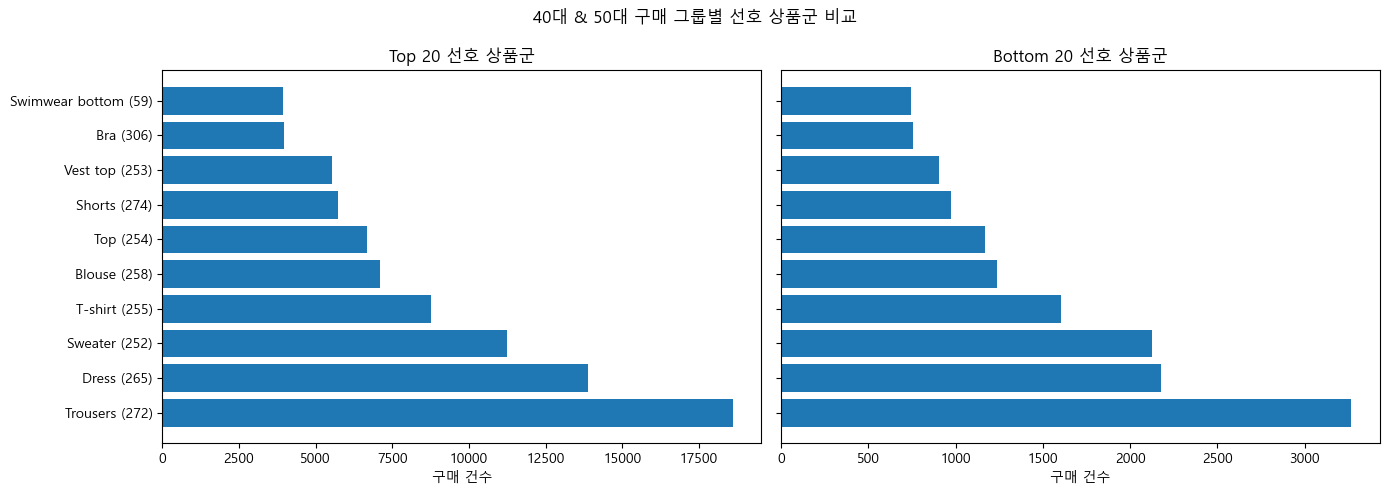

In [256]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Top 20
axes[0].barh(
    top_product_4050['Product_Type_Info'],
    top_product_4050['Purchase_Cnt']
)
axes[0].set_title("Top 20 선호 상품군")
axes[0].invert_yaxis()

# Bottom 20
axes[1].barh(
    bottom_product_4050['Product_Type_Info'],
    bottom_product_4050['Purchase_Cnt']
)
axes[1].set_title("Bottom 20 선호 상품군")
axes[1].invert_yaxis()

for ax in axes:
    ax.set_xlabel("구매 건수")

plt.suptitle("40대 & 50대 구매 그룹별 선호 상품군 비교")
plt.tight_layout()
plt.show()


Bottom 20 에서는 상대적으로 Dress 판매량이 낮은데 그럼 남성이 bottom에 많이 포함돼서 그런걸까? 그러기엔 Bra 비율은 비슷해 보임

### 타겟 부서별 인사이트 도출

**마케팅팀**
- 20대 (고객 수 많음)  
    - 목표: 유입 유지 + 첫 구매 전환  
    - 전략:  
        - 온라인 중심 캠페인  
        - 트렌드 상품 강조  
        - 진입 장벽 낮은 프로모션  

- 30대 (구매 빈도 높음)  
    - 목표: 리텐션 유지 및 강화  
    - 전략:  
        - 세트 상품  
        - 반복 구매 유도 프로모션  
        - 멤버십/혜택 구조 강화  


**상품기획팀**

- 30대 선호 상품군  
    - 라인 확장  
    - 컬러/핏 다양화  
- 20대 판매량 상위 상품군  
    - 안정적 생산  
    - 시즌별 빠른 회전 상품으로 운영  

In [257]:
with pd.option_context('display.max_rows', None):
    print(df['Product_Type_Info'].value_counts())

Product_Type_Info
Trousers (272)                    105465
Dress (265)                        80749
Sweater (252)                      70385
T-shirt (255)                      56036
Top (254)                          41753
Blouse (258)                       40494
Vest top (253)                     37281
Shorts (274)                       32993
Bra (306)                          31788
Swimwear bottom (59)               30166
Bikini top (298)                   29790
Underwear bottom (286)             26618
Skirt (275)                        23611
Shirt (259)                        18771
Leggings/Tights (273)              17298
Jacket (262)                       12471
Hoodie (308)                       11874
Socks (302)                        11301
Blazer (264)                       10502
Cardigan (245)                      9228
Swimsuit (57)                       8051
Jumpsuit/Playsuit (267)             6883
Bag (66)                            5830
Underwear Tights (304)              507